# Introduction
<font color = 'darkblue'>
    
## Content:
    
 1. [Load and Check Data](#1)   
 2. [Data Analysis](#2)
    * [General Analysis](#3)
    * [Yearly Analysis](#4)
 3. [Visualization](#5)
    * [General Analysis](#6)
    * [Yearly Analysis](#7)
 4. [Combined Datasets](#8)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv
/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv


<a id='1'></a>
# Load and Check Data

In [2]:
data_general=pd.read_csv('/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv')
data_general

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


In [3]:
data_general.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual'],
      dtype='object')

In [4]:
data_general.describe()

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [5]:
data_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Regional indicator            143 non-null    object 
 2   Ladder score                  143 non-null    float64
 3   upperwhisker                  143 non-null    float64
 4   lowerwhisker                  143 non-null    float64
 5   Log GDP per capita            140 non-null    float64
 6   Social support                140 non-null    float64
 7   Healthy life expectancy       140 non-null    float64
 8   Freedom to make life choices  140 non-null    float64
 9   Generosity                    140 non-null    float64
 10  Perceptions of corruption     140 non-null    float64
 11  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


Bu verisetini, Regional indicator faktörüne göre gruplandırmak ve bu şekilde analiz yapmak daha kolay olur.  

In [6]:
print(data_general['Regional indicator'].value_counts(dropna =False))

Regional indicator
Sub-Saharan Africa                    35
Western Europe                        20
Latin America and Caribbean           19
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    10
Southeast Asia                         9
East Asia                              6
South Asia                             6
North America and ANZ                  4
Name: count, dtype: int64


In [7]:
data_yearly=pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-updated_2024.csv", encoding="latin1")
data_yearly

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


In [8]:
data_yearly.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [9]:
data_yearly.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [10]:
data_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


Bu verisetinde farklı ülkeler için farklı yıllara ait veriler var. O yüzden bu verisetini ülkelere göre gruplayarak analiz edeceğim.

In [11]:
print(data_yearly['Country name'].value_counts(dropna =False))

Country name
Lebanon      18
Jordan       18
Nicaragua    18
Nepal        18
Moldova      18
             ..
Cuba          1
Suriname      1
Guyana        1
Oman          1
Maldives      1
Name: count, Length: 165, dtype: int64


<a id='2'></a>
# Data Analysis

<a id='3'></a>
* [General Analysis]

Günün sonunda önemli olan faktör *Ladder score* olduğu için ona göre baş ve sondaki sıralamaları gösterdim.

In [12]:
data_general.sort_values(by='Ladder score',ascending=True).head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
142,Afghanistan,South Asia,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
137,Zimbabwe,Sub-Saharan Africa,3.341,3.457,3.226,0.748,0.850,0.232,0.487,0.096,0.131,0.797
136,Botswana,Sub-Saharan Africa,3.383,3.558,3.209,1.445,0.969,0.241,0.567,0.014,0.082,0.066
135,Malawi,Sub-Saharan Africa,3.421,3.561,3.281,0.617,0.410,0.349,0.571,0.135,0.136,1.203
134,Eswatini,Sub-Saharan Africa,3.502,3.673,3.331,1.255,0.925,0.176,0.284,0.059,0.116,0.686
133,Zambia,Sub-Saharan Africa,3.502,3.636,3.368,0.899,0.809,0.264,0.727,0.168,0.109,0.526


In [13]:
data_general.sort_values(by='Ladder score',ascending=False).head(10)

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,Western Europe,7.319,7.383,7.256,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,Western Europe,7.302,7.389,7.215,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,Western Europe,7.122,7.213,7.031,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,Western Europe,7.060,7.147,6.973,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,North America and ANZ,7.057,7.141,6.973,1.854,1.461,0.692,0.756,0.225,0.323,1.745


Verilerin birbirine göre korelasyonunu inceledim. Ladder Score ve GDP, Social Support ve Healty Life Expactancy arasında yüksek bir bağlantı yakaladım.

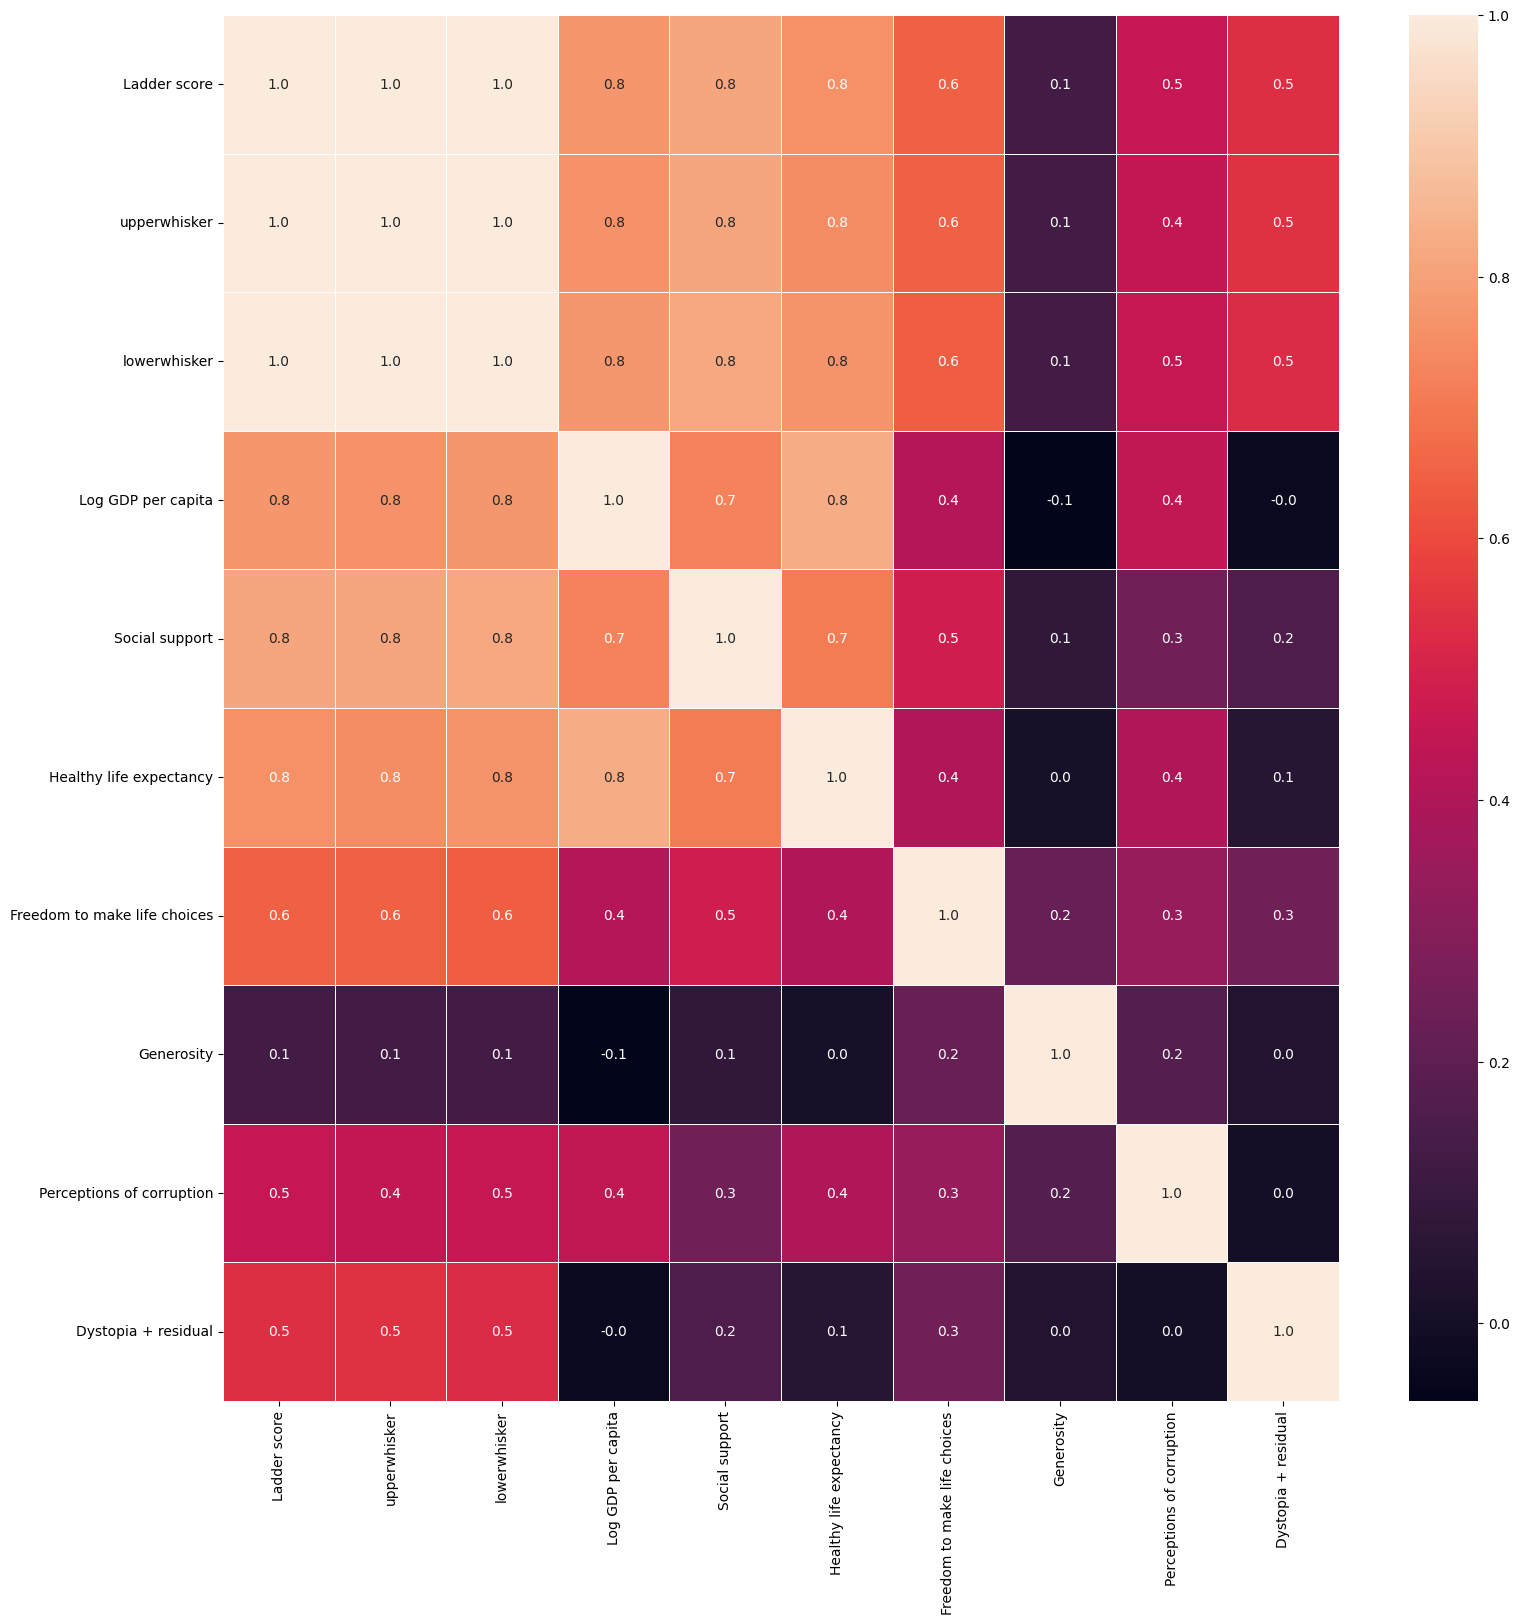

In [14]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_general.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Korelasyon analizinde yüksek bağlantılı bulduğum değişkenleri sağlıklı bir şekilde birleştirebilmek için `StandardScaler` kullandım. Bu işlem, her değişkenin analize eşit ağırlıkta katılmasını sağlar.
Bu üç temel sütunun standartlaştırılmış değerlerinin toplamı ile her ülke için bir **Prosperity Index** oluşturdum.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = ["Log GDP per capita", "Healthy life expectancy", "Social support"]

data_general[cols] = scaler.fit_transform(data_general[cols])

data_general["Prosperity Index"] = data_general[cols].sum(axis=1)
data_general

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Prosperity Index
0,Finland,Western Europe,7.741,7.815,7.667,1.098248,1.317793,1.059525,0.859,0.142,0.546,2.082,3.475565
1,Denmark,Western Europe,7.583,7.665,7.500,1.249342,1.161225,1.083865,0.823,0.204,0.548,1.881,3.494432
2,Iceland,Western Europe,7.525,7.618,7.433,1.185599,1.453284,1.199485,0.819,0.258,0.182,2.050,3.838368
3,Sweden,Western Europe,7.344,7.422,7.267,1.178516,1.104018,1.235996,0.838,0.221,0.524,1.658,3.518530
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.001453,1.140149,1.333360,0.641,0.153,0.193,2.298,3.474961
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,-1.994458,-1.413110,-1.575378,0.473,0.189,0.072,1.102,-4.982945
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,-1.711156,-1.711191,-1.630145,0.469,0.181,0.053,1.068,-5.052492
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,-1.434938,-0.853079,-3.169707,0.523,0.082,0.085,0.875,-5.457724
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,-0.004266,-1.678071,0.213678,0.173,0.068,0.029,-0.073,-1.468659


Happiness level, Ladder score medyan değeri esas alınarak sınıflandırılmıştır. Bu daha doğru bir yaklaşım olmuştur.

In [16]:
q33 = data_general["Ladder score"].quantile(0.33)
q66 = data_general["Ladder score"].quantile(0.66)

def label(x):
    if x < q33:
        return "low"
    elif x < q66:
        return "medium"
    else:
        return "high"

data_general["Happiness Level"] = data_general["Ladder score"].apply(label)
data_general


,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Prosperity Index,Happiness Level
0,Finland,Western Europe,7.741,7.815,7.667,1.098248,1.317793,1.059525,0.859,0.142,0.546,2.082,3.475565,high
1,Denmark,Western Europe,7.583,7.665,7.500,1.249342,1.161225,1.083865,0.823,0.204,0.548,1.881,3.494432,high
2,Iceland,Western Europe,7.525,7.618,7.433,1.185599,1.453284,1.199485,0.819,0.258,0.182,2.050,3.838368,high
3,Sweden,Western Europe,7.344,7.422,7.267,1.178516,1.104018,1.235996,0.838,0.221,0.524,1.658,3.518530,high
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.001453,1.140149,1.333360,0.641,0.153,0.193,2.298,3.474961,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,-1.994458,-1.413110,-1.575378,0.473,0.189,0.072,1.102,-4.982945,low
139,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,-1.711156,-1.711191,-1.630145,0.469,0.181,0.053,1.068,-5.052492,low
140,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,-1.434938,-0.853079,-3.169707,0.523,0.082,0.085,0.875,-5.457724,low
141,Lebanon,Middle East and North Africa,2.707,2.797,2.616,-0.004266,-1.678071,0.213678,0.173,0.068,0.029,-0.073,-1.468659,low


In [17]:
print(data_general['Happiness Level'].value_counts(dropna =False))

Happiness Level
high      49
medium    47
low       47
Name: count, dtype: int64


Prosperity Level` ve `Regional indicator` değişkenlerini index değer olarak atayarak data2 setini oluşturdum.

In [18]:
data2 = data_general.set_index(["Happiness Level","Regional indicator"]) 
data2.sort_index(inplace=True)
data2.head(100)

Country name  \
Happiness Level Regional indicator                                   
high            Central and Eastern Europe                 Czechia   
                Central and Eastern Europe               Lithuania   
                Central and Eastern Europe                Slovenia   
                Central and Eastern Europe                  Kosovo   
                Central and Eastern Europe                 Romania   
...                                                            ...   
low             Sub-Saharan Africa                         Lesotho   
medium          Central and Eastern Europe                 Hungary   
                Central and Eastern Europe                 Croatia   
                Central and Eastern Europe  Bosnia and Herzegovina   
                Central and Eastern Europe              Montenegro   

                                            Ladder score  upperwhisker  \
Happiness Level Regional indicator                                       
high            Central and Eastern Europe         6.822         6.903   
                Central and Eastern Europe         6.818         6.896   
                Central and Eastern Europe         6.743         6.843   
                Central and Eastern Europe         6.561         6.667   
                Central and Eastern Europe         6.491         6.592   
...                                                  ...           ...   
low             Sub-Saharan Africa                 3.186         3.469   
medium          Central and Eastern Europe         6.017         6.124   
                Central and Eastern Europe         5.942         6.047   
                Central and Eastern Europe         5.877         5.979   
                Central and Eastern Europe         5.707         5.815   

                                            lowerwhisker  Log GDP per capita  \
Happiness Level Regional indicator                                             
high            Central and Eastern Europe         6.741            0.954236   
                Central and Eastern Europe         6.739            0.914102   
                Central and Eastern Europe         6.643            0.961319   
                Central and Eastern Europe         6.455           -0.034957   
                Central and Eastern Europe         6.390            0.755925   
...                                                  ...                 ...   
low             Sub-Saharan Africa                 2.904           -1.434938   
medium          Central and Eastern Europe         5.910            0.810225   
                Central and Eastern Europe         5.837            0.781895   
                Central and Eastern Europe         5.775            0.203488   
                Central and Eastern Europe         5.599            0.453737   

                                            Social support  \
Happiness Level Regional indicator                           
high            Central and Eastern Europe        1.134127   
                Central and Eastern Europe        0.962505   
                Central and Eastern Europe        1.107029   
                Central and Eastern Europe        0.429572   
                Central and Eastern Europe        0.306124   
...                                                    ...   
low             Sub-Saharan Africa               -0.853079   
medium          Central and Eastern Europe        1.185313   
                Central and Eastern Europe        0.935406   
                Central and Eastern Europe        0.553020   
                Central and Eastern Europe        0.553020   

                                            Healthy life expectancy  \
Happiness Level Regional indicator                                    
high            Central and Eastern Europe                 0.712667   
                Central and Eastern Europe                 0.469258   
                Central and Eastern Europe      

<a id='4'></a>
* [Yearly Analysis]

Öncelikle Life Ladder değişkenine göre ilk ve sondan 10 veriyi görmek istedim.

In [19]:
data_yearly.sort_values(by='Life Ladder',ascending=False).head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
539,Denmark,2005,8.019,10.849,0.972,68.300,0.971,NaN,0.237,0.777,0.154
541,Denmark,2008,7.971,10.878,0.954,68.960,0.970,0.266,0.248,0.759,0.163
677,Finland,2020,7.889,10.766,0.962,71.075,0.962,-0.123,0.164,0.748,0.193
675,Finland,2018,7.858,10.780,0.962,70.925,0.938,-0.133,0.199,0.749,0.182
540,Denmark,2007,7.834,10.889,0.954,68.740,0.932,0.234,0.206,0.778,0.194
678,Finland,2021,7.794,10.794,0.970,71.150,0.963,-0.039,0.192,0.752,0.175
674,Finland,2017,7.788,10.770,0.964,70.850,0.962,-0.008,0.192,0.756,0.176
544,Denmark,2011,7.788,10.845,0.962,69.620,0.935,0.292,0.220,0.778,0.175
676,Finland,2019,7.780,10.791,0.937,71.000,0.948,-0.058,0.195,0.732,0.181
2007,Switzerland,2012,7.776,11.094,0.947,71.520,0.945,0.131,0.323,0.793,0.176


In [20]:
data_yearly.sort_values(by='Life Ladder',ascending=True).head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,Afghanistan,2022,1.281,NaN,0.228,54.875,0.368,NaN,0.733,0.206,0.576
14,Afghanistan,2023,1.446,NaN,0.368,55.200,0.228,NaN,0.738,0.261,0.460
1192,Lebanon,2021,2.179,9.472,0.507,66.150,0.423,-0.164,0.905,0.263,0.569
1193,Lebanon,2022,2.352,9.458,0.535,66.225,0.450,-0.130,0.883,0.298,0.430
11,Afghanistan,2019,2.375,7.640,0.420,53.900,0.394,-0.109,0.924,0.324,0.502
12,Afghanistan,2021,2.436,7.325,0.454,54.550,0.394,-0.085,0.946,0.179,0.607
1834,Sierra Leone,2022,2.560,7.400,0.502,55.300,0.660,0.097,0.862,0.494,0.505
1191,Lebanon,2020,2.634,9.532,0.547,66.075,0.552,-0.139,0.884,0.352,0.482
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371
2023,Syria,2013,2.688,8.419,0.585,59.820,0.455,0.219,0.663,0.354,0.622


Eksik verileri analiz ettim.

In [21]:
missing_count = data_yearly.isnull().sum()
missing_percentage = (data_yearly.isnull().sum() / len(data_yearly)) * 100
missing_df = pd.DataFrame({
    'Eksik Değer Sayısı': missing_count,
    'Yüzde (%)': missing_percentage
})
print(missing_df.to_markdown())

|                                  |   Eksik Değer Sayısı |   Yüzde (%) |
|:---------------------------------|---------------------:|------------:|
| Country name                     |                    0 |    0        |
| year                             |                    0 |    0        |
| Life Ladder                      |                    0 |    0        |
| Log GDP per capita               |                   28 |    1.18493  |
| Social support                   |                   13 |    0.550148 |
| Healthy life expectancy at birth |                   63 |    2.6661   |
| Freedom to make life choices     |                   36 |    1.52349  |
| Generosity                       |                   81 |    3.42785  |
| Perceptions of corruption        |                  125 |    5.28989  |
| Positive affect                  |                   24 |    1.01566  |
| Negative affect                  |                   16 |    0.677105 |


Veri setindeki eksik değerlerin (NaN) toplam veri setine oranını oldukça düşük olduğu için eksik kısımları ortalamaları ile doldurmanın mantıklı olduğunu düşündüm.

In [22]:
numeric_df = data_yearly.select_dtypes(include=[np.number])
data_yearly[numeric_df.columns] = data_yearly[numeric_df.columns].fillna(data_yearly[numeric_df.columns].mean())

data_yearly.isnull().sum().sum()

0

Değişkenlerin birbirine göre ilişkilerini gözlemledim. 

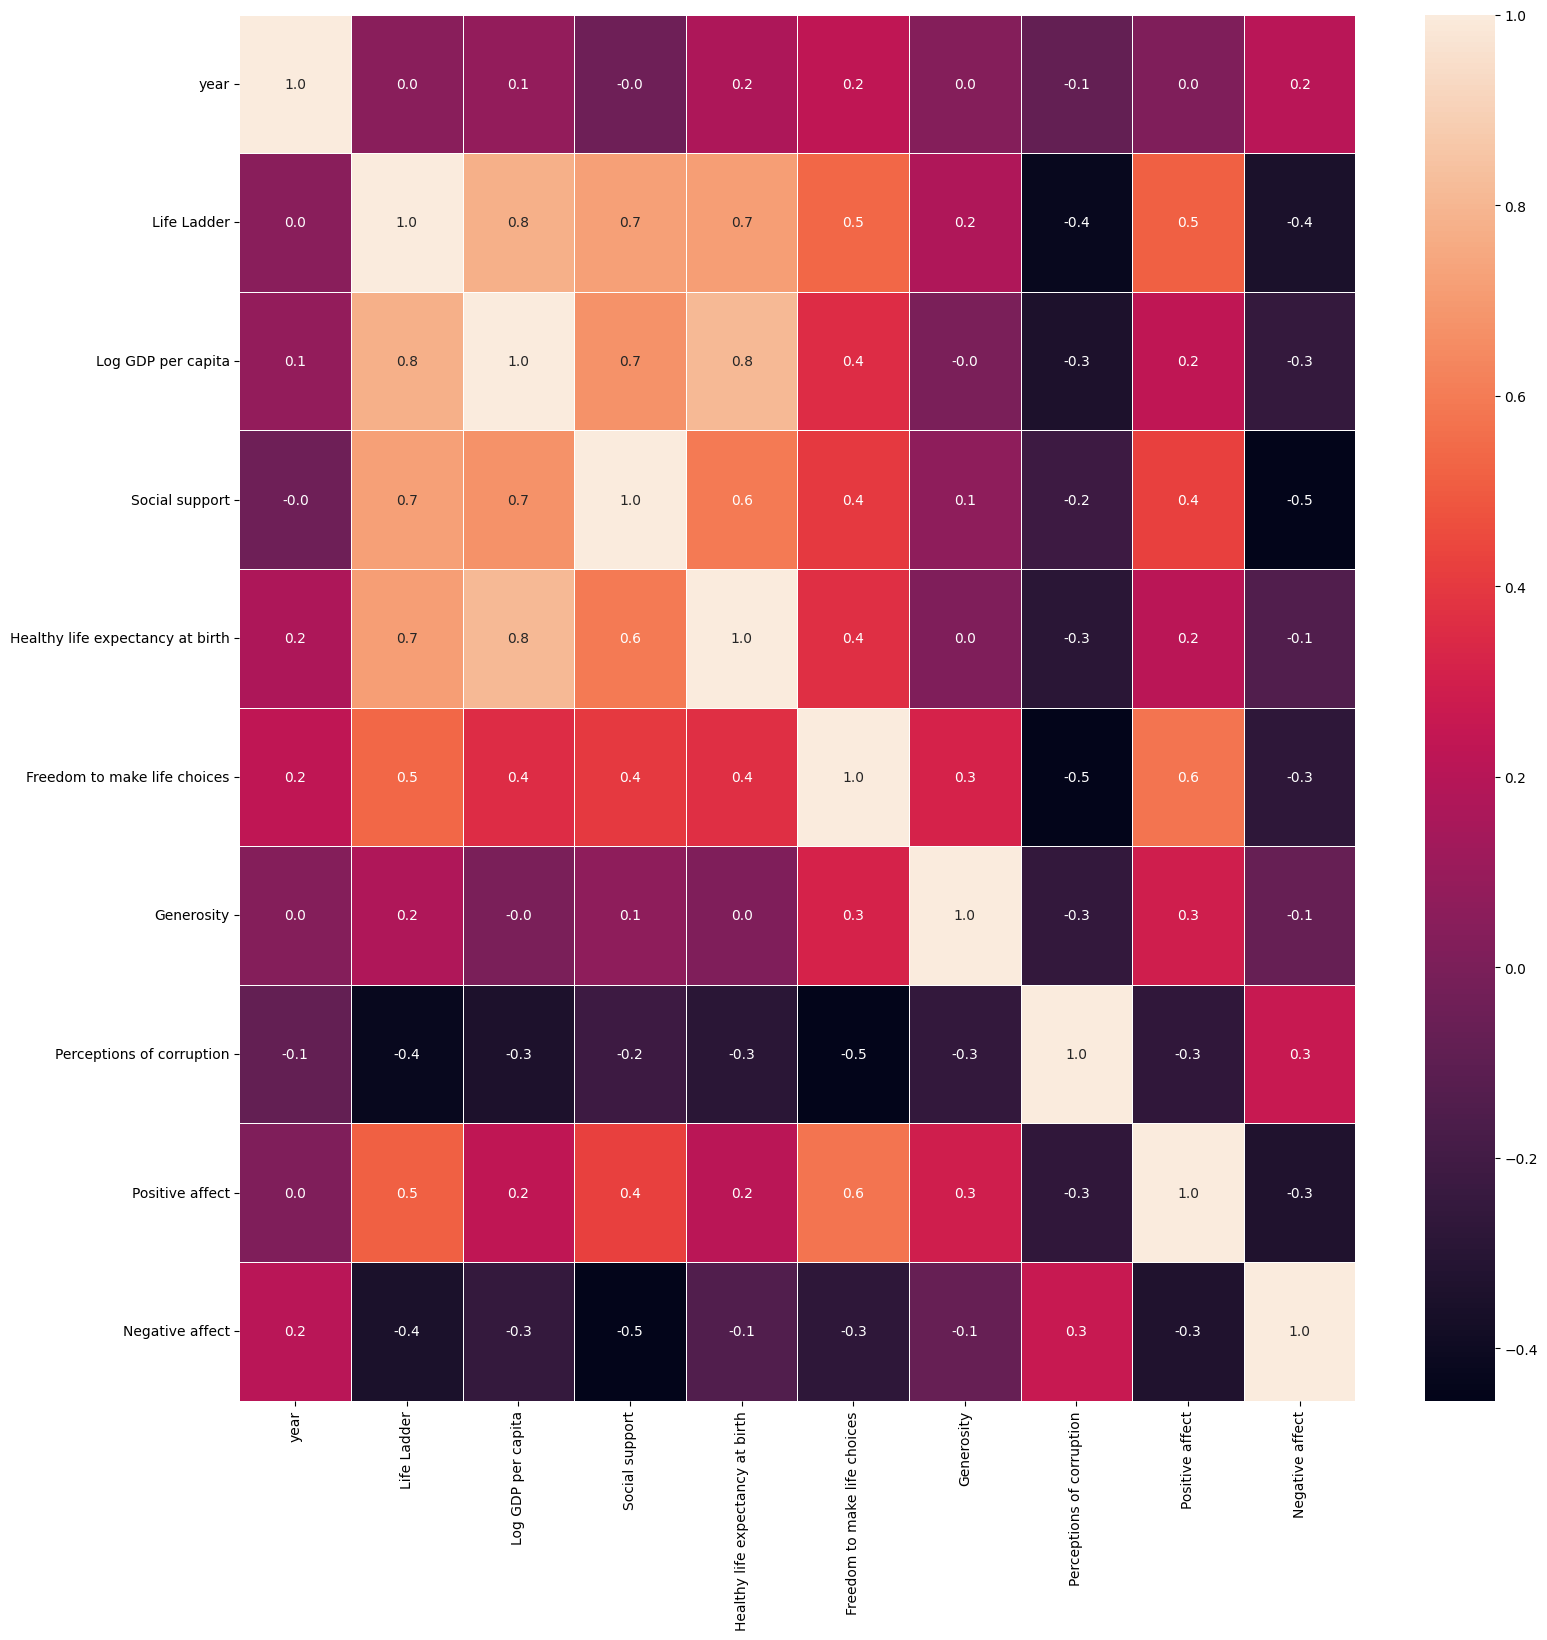

In [23]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_yearly.corr(numeric_only=True), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Bu korelasyon ilişkisine bakıldığında önceki verisetine benzer şekilde life ladder, GDP, social support ve healty life expactancy at birth kısmında yüksek oranlar yakladım. 

Faktörlerin birbirleriyle olan ilişkilerini ve ülkeler arasındaki dağılımlarını tek bir grafik üzerinde kıyaslayabilmek için veriyi melt formatıyla yazdım.

In [24]:
factors = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth']

df_melted = data_yearly.melt(id_vars=['Country name', 'year', 'Life Ladder'], 
                       value_vars=factors,
                       var_name='Happiness_Factor', 
                       value_name='Factor_Value')
df_melted

,Country name,year,Life Ladder,Happiness_Factor,Factor_Value
0,Afghanistan,2008,3.724,Log GDP per capita,7.350
1,Afghanistan,2009,4.402,Log GDP per capita,7.509
2,Afghanistan,2010,4.758,Log GDP per capita,7.614
3,Afghanistan,2011,3.832,Log GDP per capita,7.581
4,Afghanistan,2012,3.783,Log GDP per capita,7.661
...,...,...,...,...,...
7084,Zimbabwe,2019,2.694,Healthy life expectancy at birth,53.100
7085,Zimbabwe,2020,3.160,Healthy life expectancy at birth,53.575
7086,Zimbabwe,2021,3.155,Healthy life expectancy at birth,54.050
7087,Zimbabwe,2022,3.296,Healthy life expectancy at birth,54.525


In [25]:
data2 = data_yearly.set_index(["Country name","year"]) 
data2.sort_index(inplace=True)
data2.head(100)

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008        3.724               7.350           0.451   
             2009        4.402               7.509           0.552   
             2010        4.758               7.614           0.539   
             2011        3.832               7.581           0.521   
             2012        3.783               7.661           0.521   
...                        ...                 ...             ...   
Australia    2021        7.112              10.815           0.920   
             2022        7.035              10.840           0.942   
             2023        7.025              10.846           0.896   
Austria      2006        7.122              10.836           0.936   
             2008        7.181              10.881           0.935   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                            50.500   
             2009                            50.800   
             2010                            51.100   
             2011                            51.400   
             2012                            51.700   
...                                             ...   
Australia    2021                            71.050   
             2022                            71.125   
             2023                            71.200   
Austria      2006                            69.500   
             2008                            69.700   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                         0.718       0.164   
             2009                         0.679       0.187   
             2010                         0.600       0.118   
             2011                         0.496       0.160   
             2012                         0.531       0.234   
...                                         ...         ...   
Australia    2021                         0.912       0.234   
             2022                         0.854       0.153   
             2023                         0.876       0.187   
Austria      2006                         0.941       0.297   
             2008                         0.879       0.286   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                      0.882            0.414            0.258  
             2009                      0.850            0.481            0.237  
             2010                      0.707            0.517            0.275  
             2011                      0.731            0.480            0.267  
             2012                      0.776            0.614            0.268  
...                                      ...              ...              ...  
Australia    2021                      0.454            0.740            0.235  
             2022                      0.545            0.711            0.244  
             2023                      0.482            0.731            0.248  
Austria      2006                      0.490            0.746            0.174  
             2008                      0.614            0.716            0.173  

[100 rows x 9 columns]

<a id='5'></a>
# Visualization

<a id='6'></a>
 * [General Analysis]

Bu görselleştirme, regresyon modelinde hangi değişkenlerin en güçlü tahmini güce sahip olduğunu ve bu ilişkilerin doğasını hızlıca anlamamızı sağlar.

In [26]:
def pltscatter(var1,var2 = 'Ladder score',df = data_general):
    df.plot(kind='scatter', x=var1, y=var2,alpha = 0.5,color = 'red')
    plt.xlabel(var1)             
    plt.ylabel(var2)

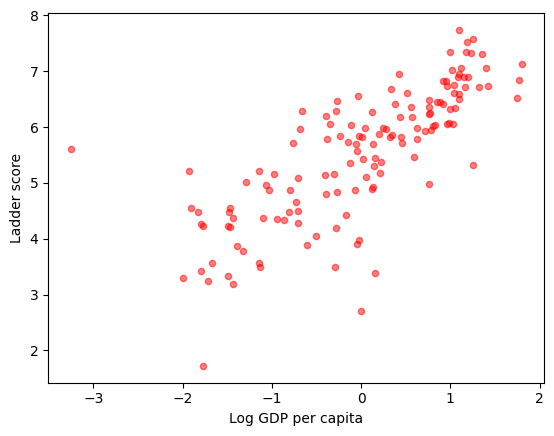

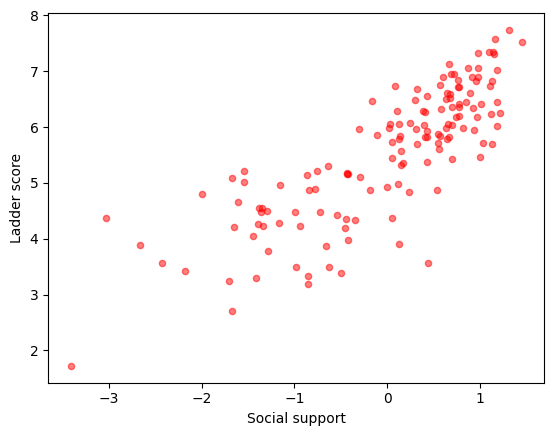

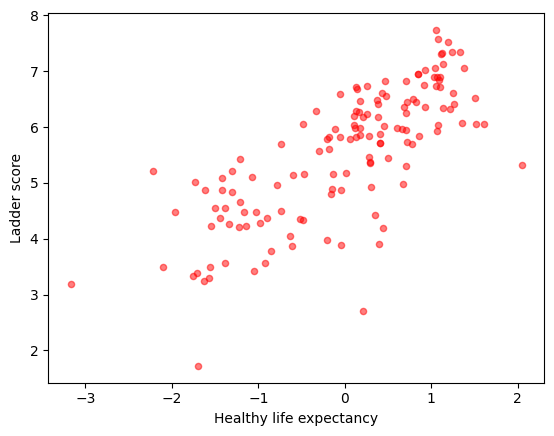

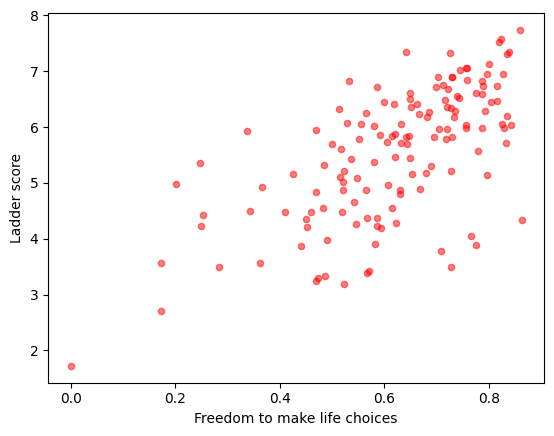

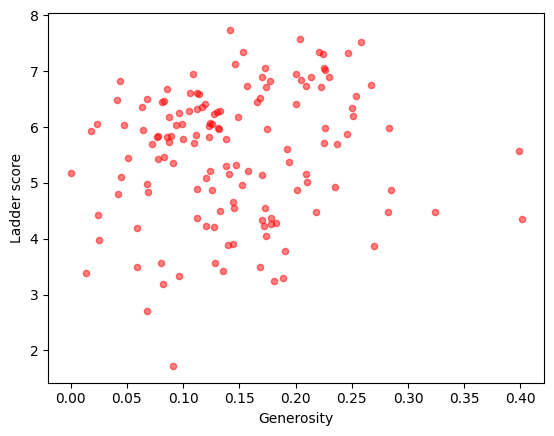

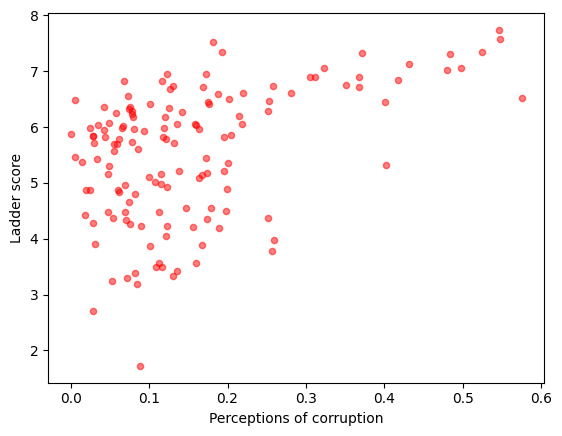

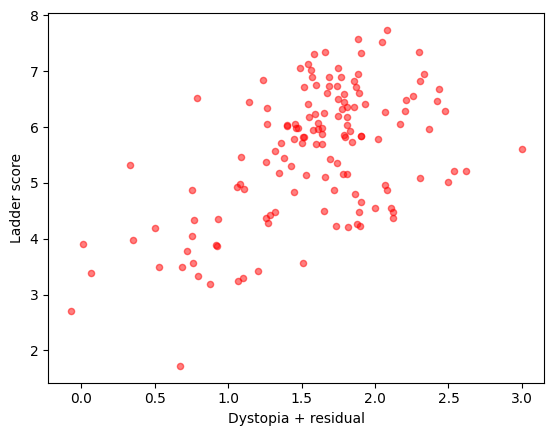

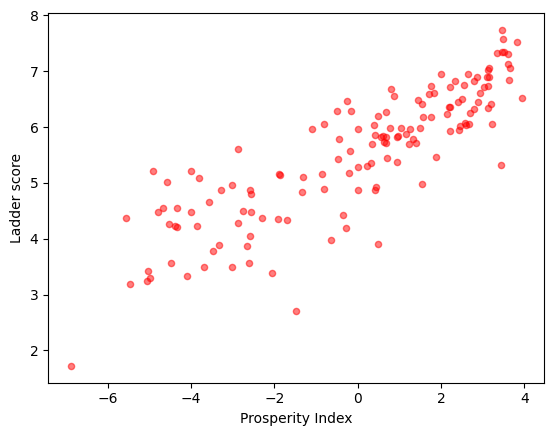

In [27]:
cat1=['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Dystopia + residual','Prosperity Index']
for c in cat1:
    pltscatter(c)

Bu görselleştirme ile, her bir faktörün ne kadar homojen ya da heterojen dağıldığı netleşir.

In [28]:
def plot_histogram(variable, df=data_general):

    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df,
        x=variable,
        bins=15,
        color='mediumpurple'
    )
    plt.title(f'{variable} Değerlerinin Frekans Dağılımı')
    plt.xlabel(variable)
    plt.ylabel('Frekans')
    plt.show()


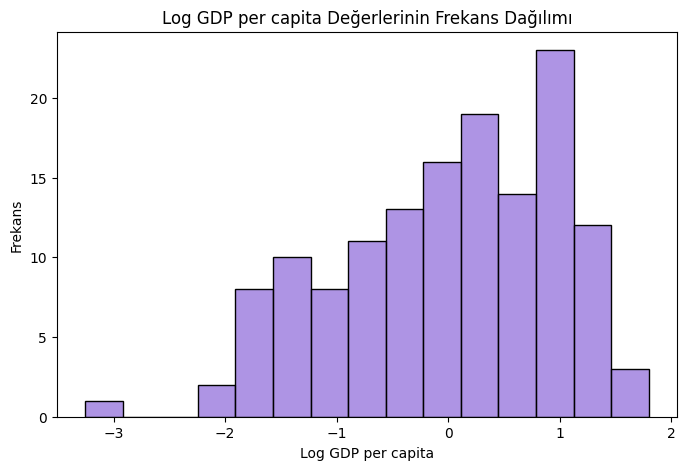

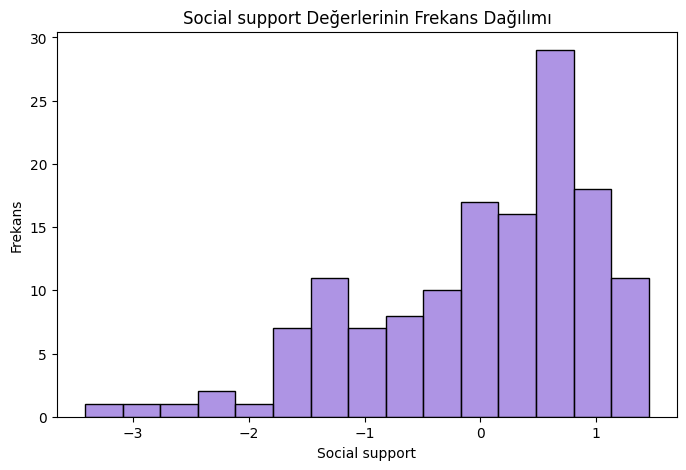

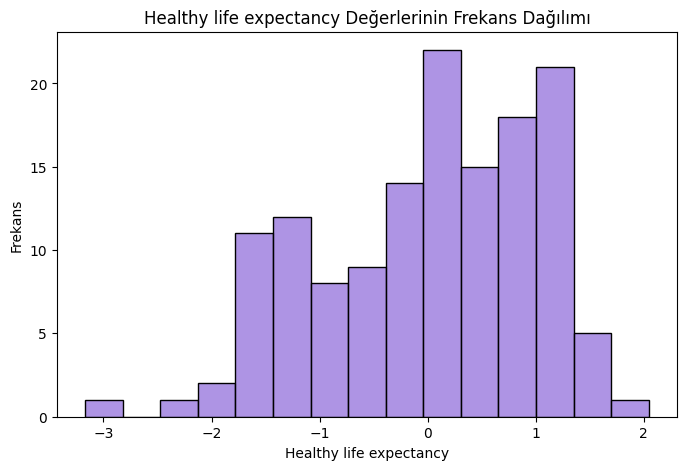

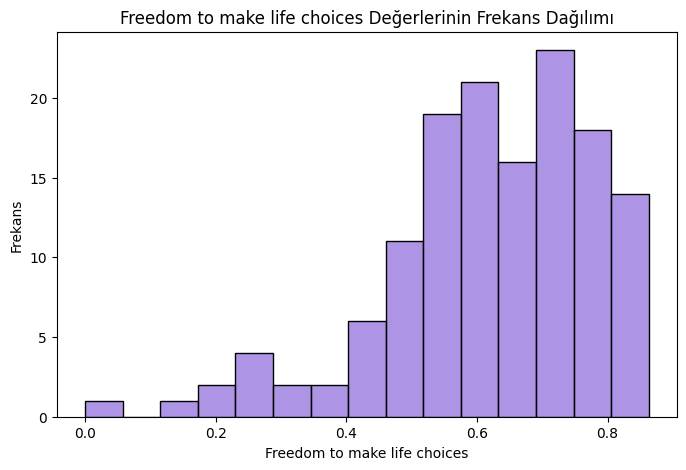

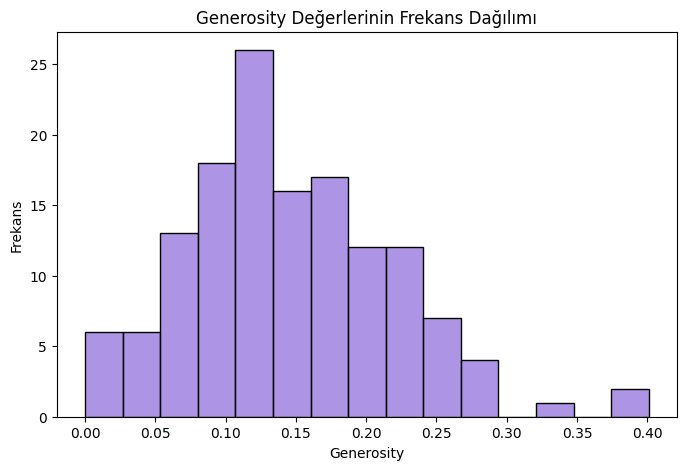

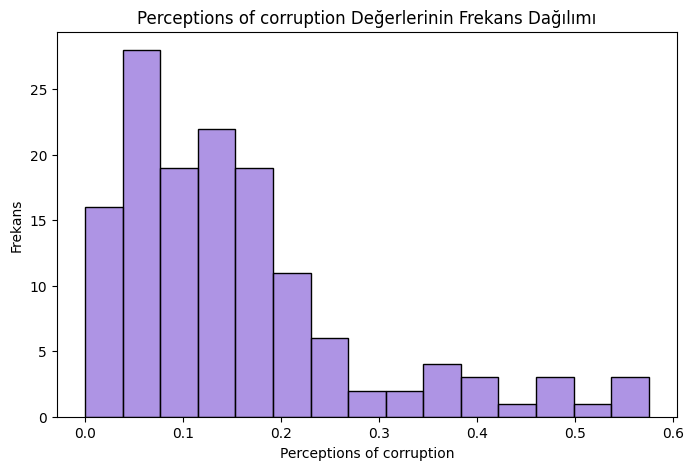

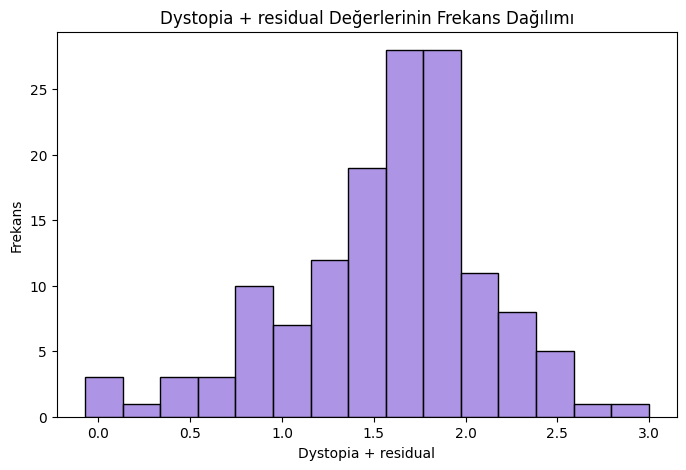

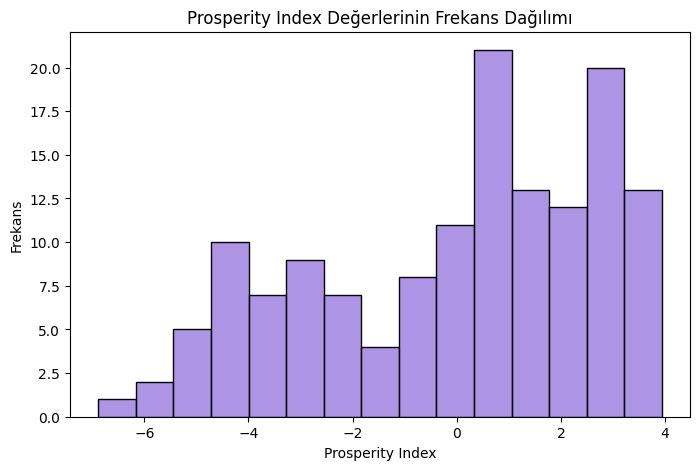

In [29]:
for c in cat1:
    plot_histogram(c)

Bölgesel karşılaştırma, değişkenlere göre bir ülkenin refah seviyesi üzerindeki belirleyici rolünü açıkça gözler önüne sermektedir.

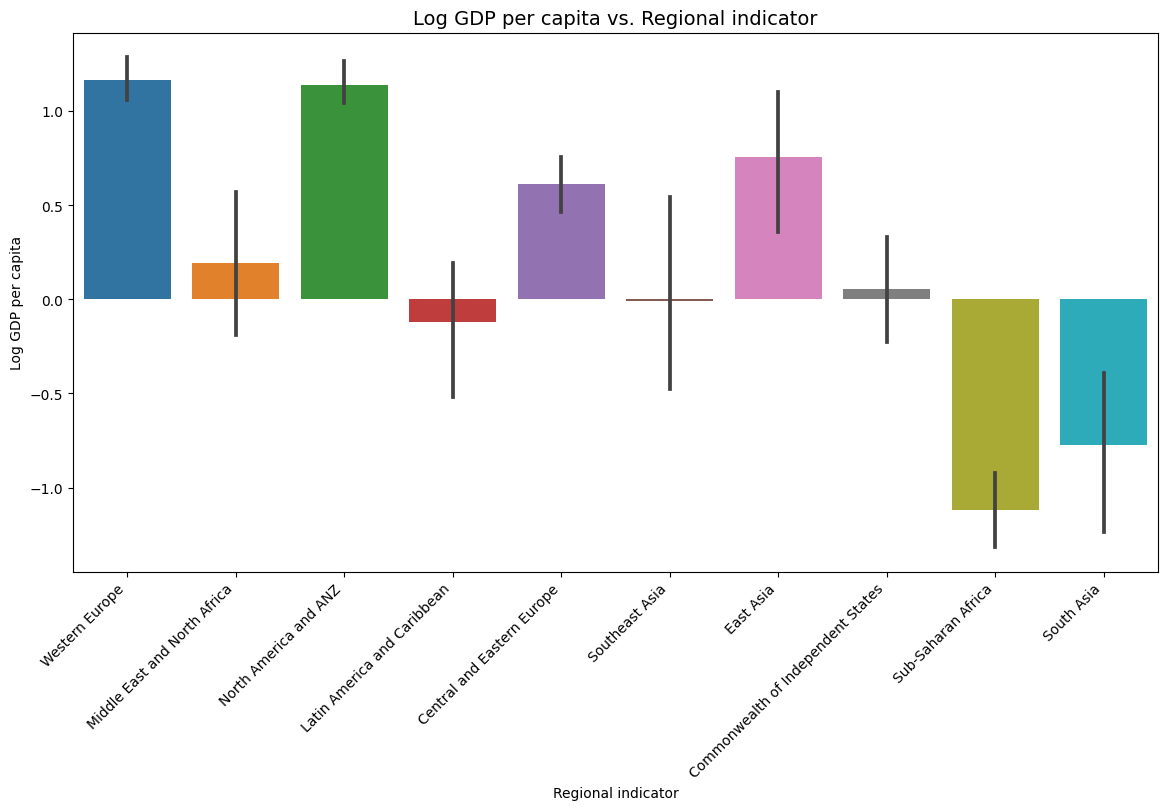

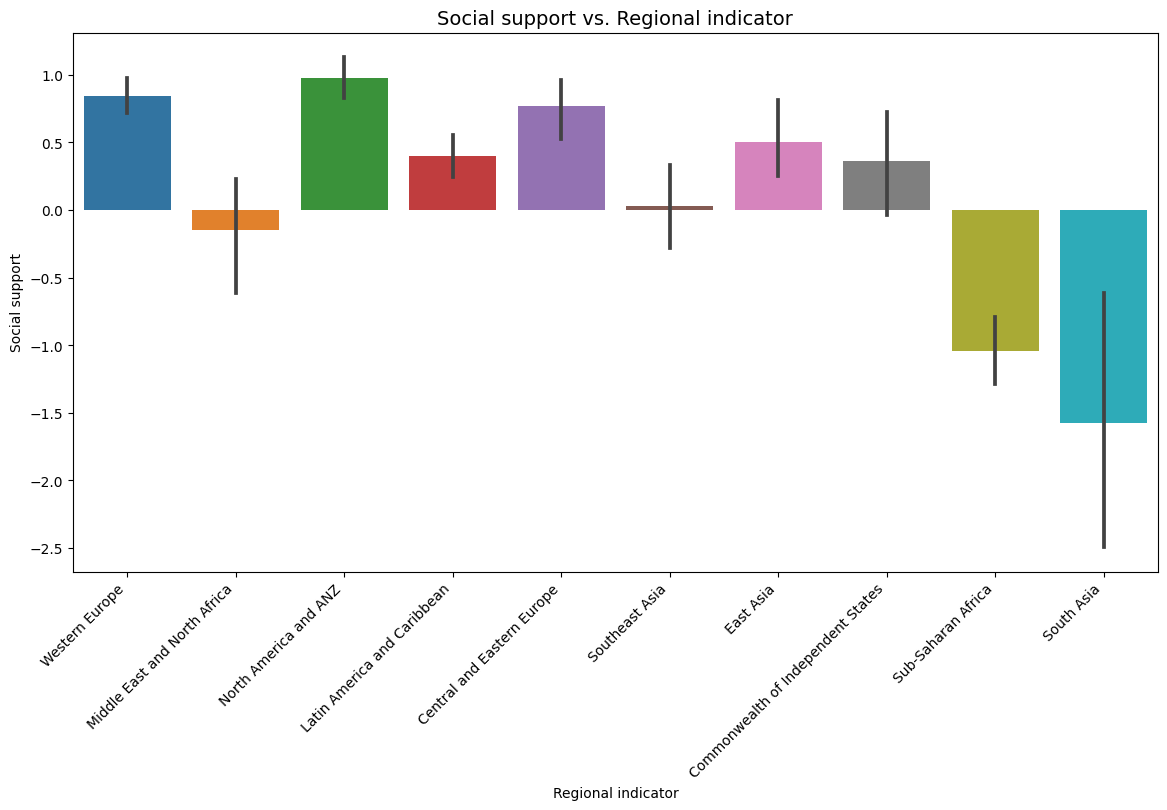

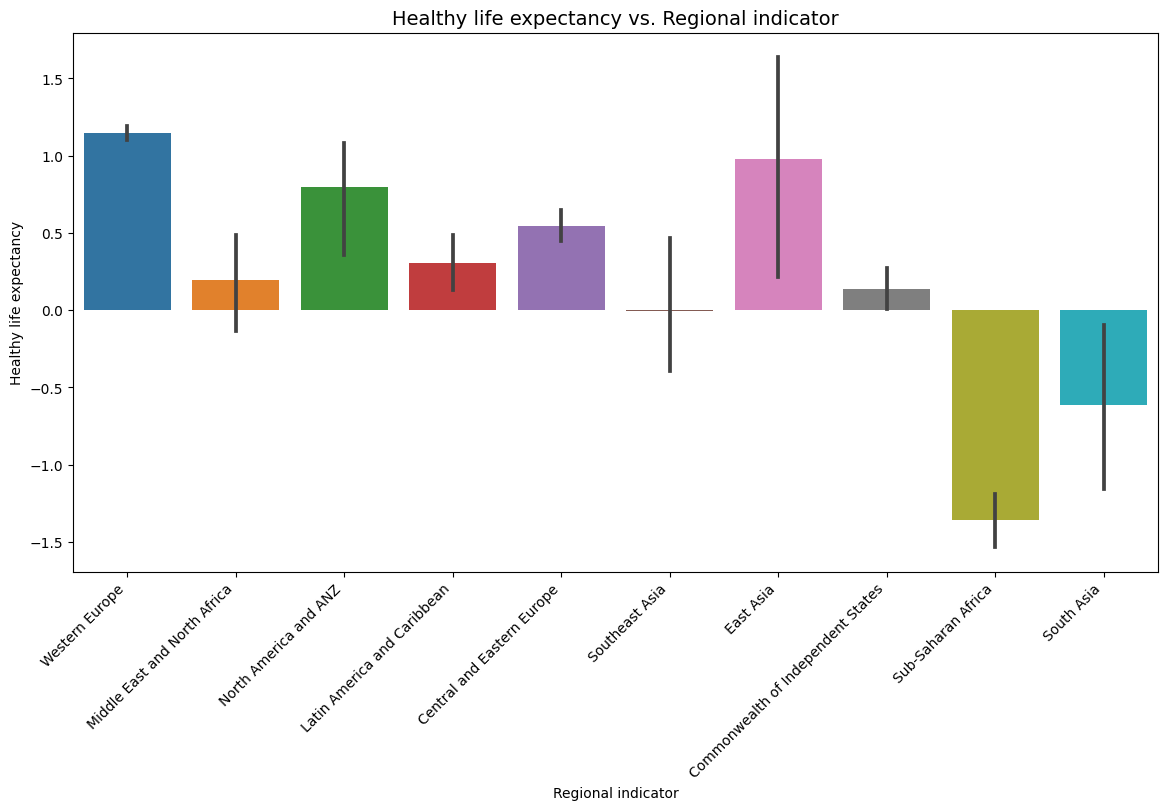

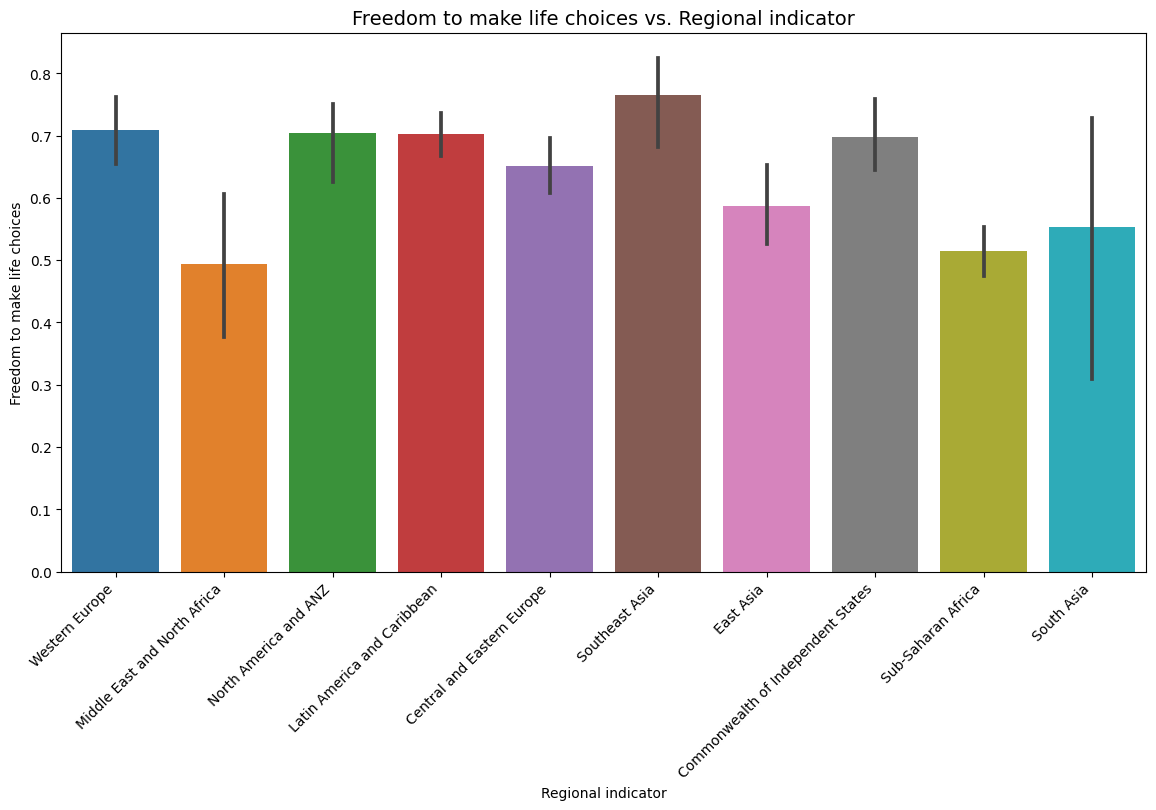

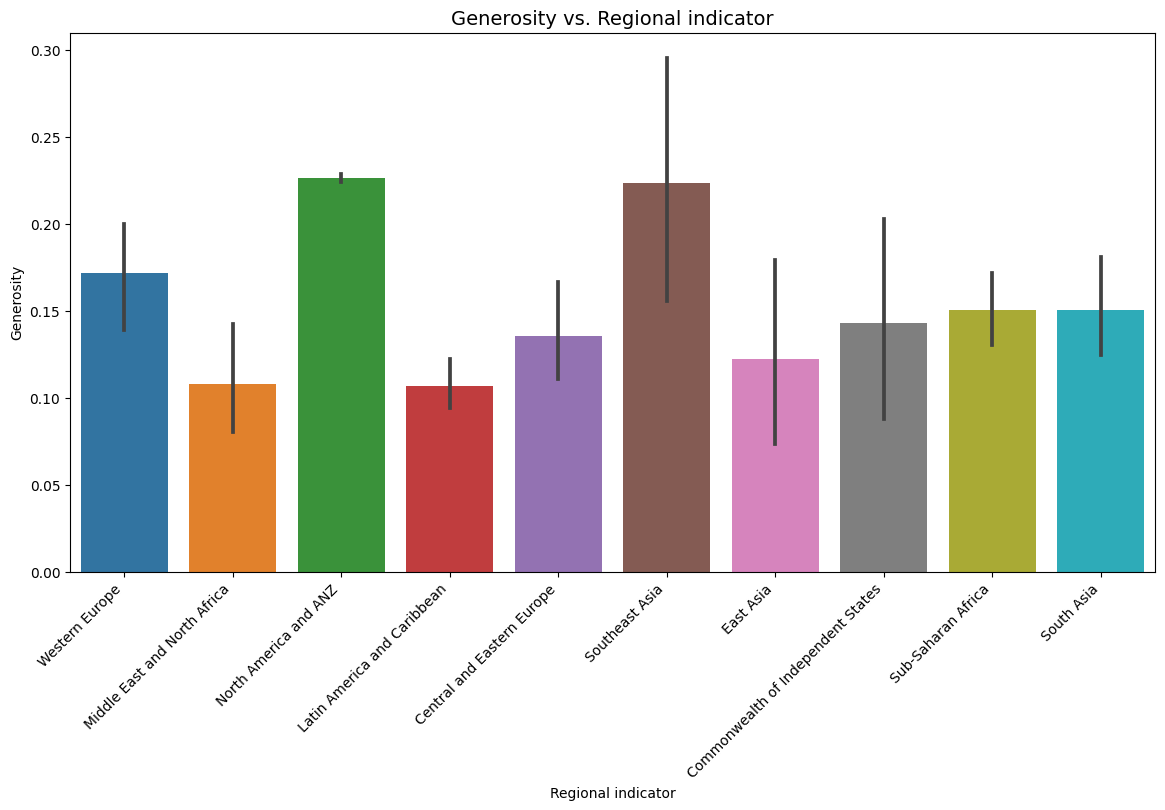

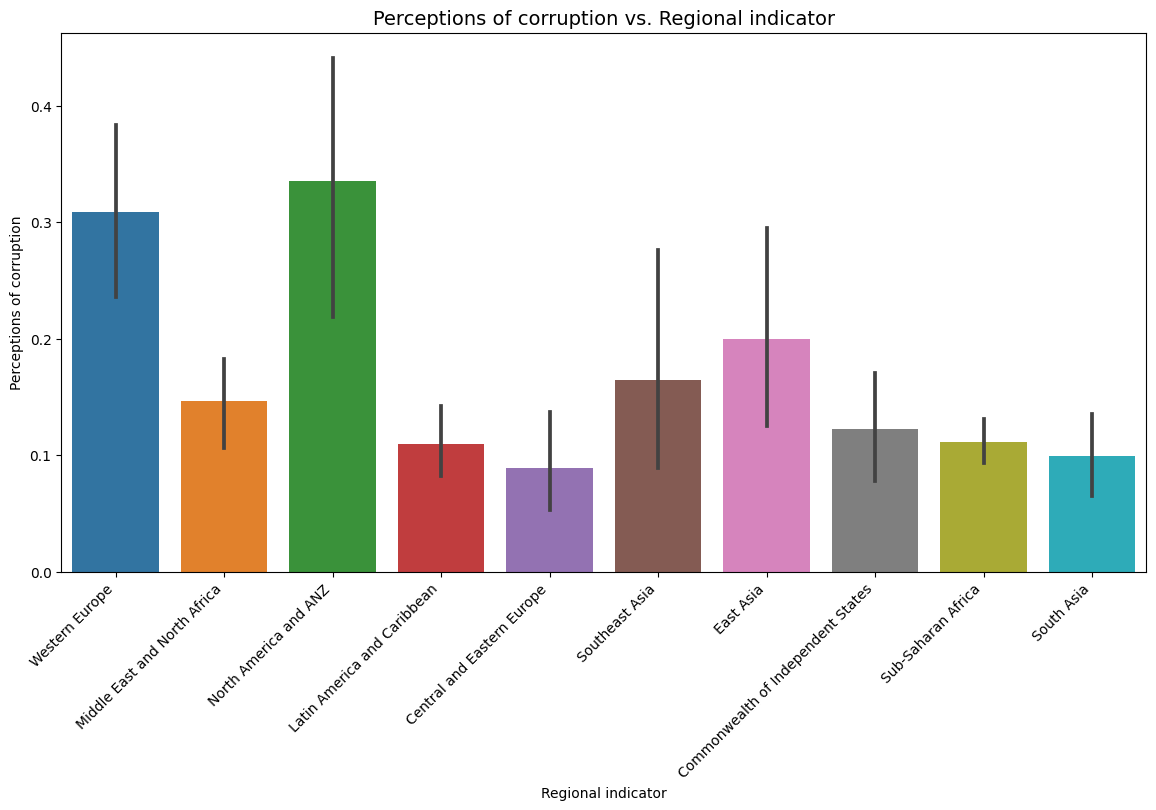

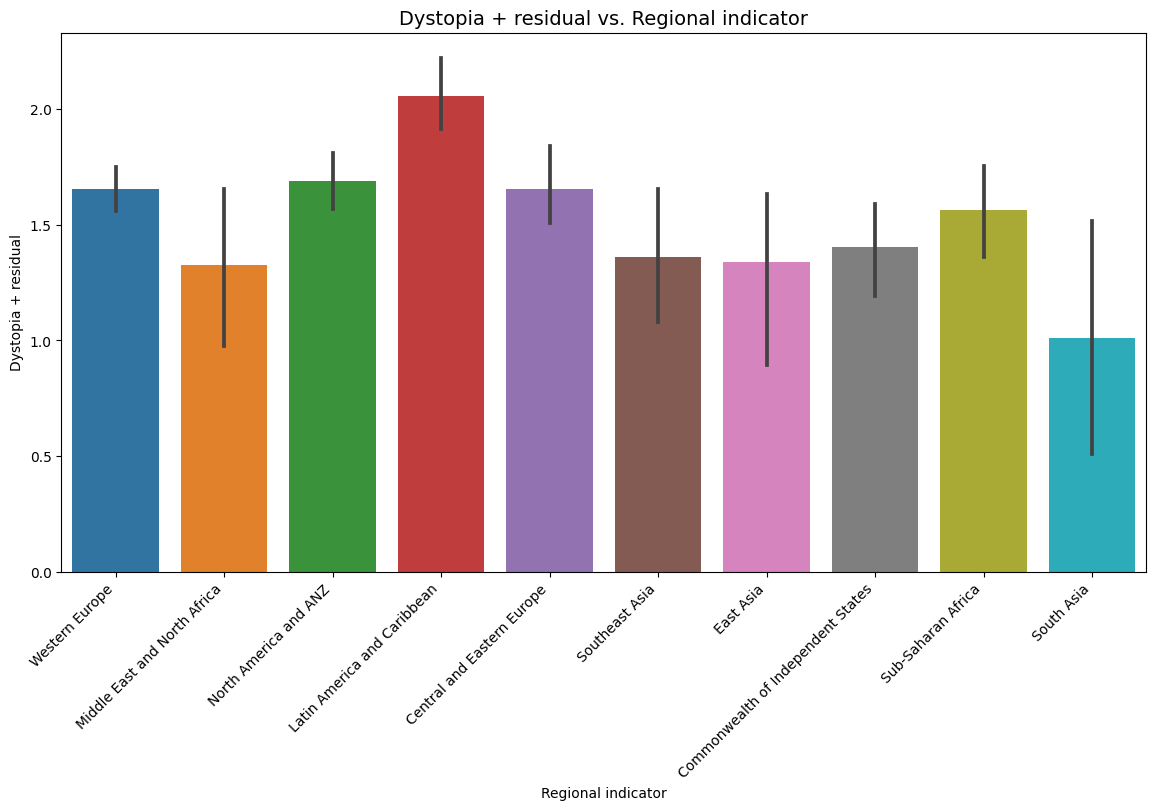

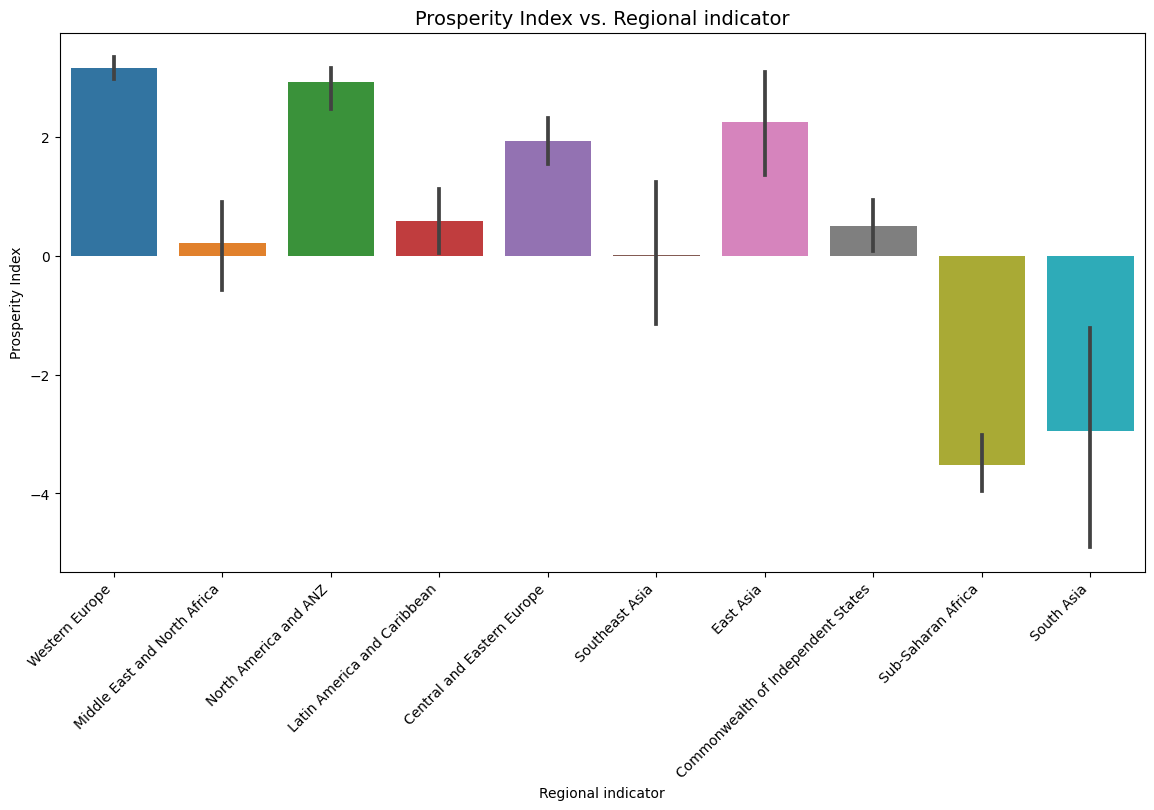

In [30]:
def barplot(var1,var2='Regional indicator'):
    plt.figure(figsize=(14, 7))
    sns.barplot(
        data=data_general, 
        x=var2,
        y=var1,)
    
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{var1} vs. {var2}', fontsize=14)
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.show()
    
for c in cat1:
    barplot(c)

Bu kutu grafiği, `Ladder score` değişkeninin, `Regional indicator` kategorisine göre nasıl dağıldığını görselleştirmektedir. Bu görselleştirme, sadece hangi bölgelerin ortalama olarak daha mutlu olduğunu değil, aynı zamanda o bölge içinde mutluluk seviyelerinin ne kadar tutarlı (dar kutu) veya dengesiz (geniş kutu) olduğunu da anlamamızı sağlar. 

In [31]:
Q1 = data_general['Ladder score'].quantile(0.25)
Q3 = data_general['Ladder score'].quantile(0.75)
IQR = Q3 - Q1

iqr_l = Q1 - 1.5 * IQR
iqr_h = Q3 + 1.5 * IQR

Bu analizde, `Ladder score` dağılımının **en uç noktaları** ile (`Dystopia + residual`) arasındaki ilişki incelenecektir.
Zaten aşırı mutlu/mutsuz olan ülkeler arasında, modelin beklentisini en çok aşan (en yüksek pozitif residual) ve en çok hayal kırıklığına uğratan (en yüksek negatif residual) vakaları tespit etmektir.

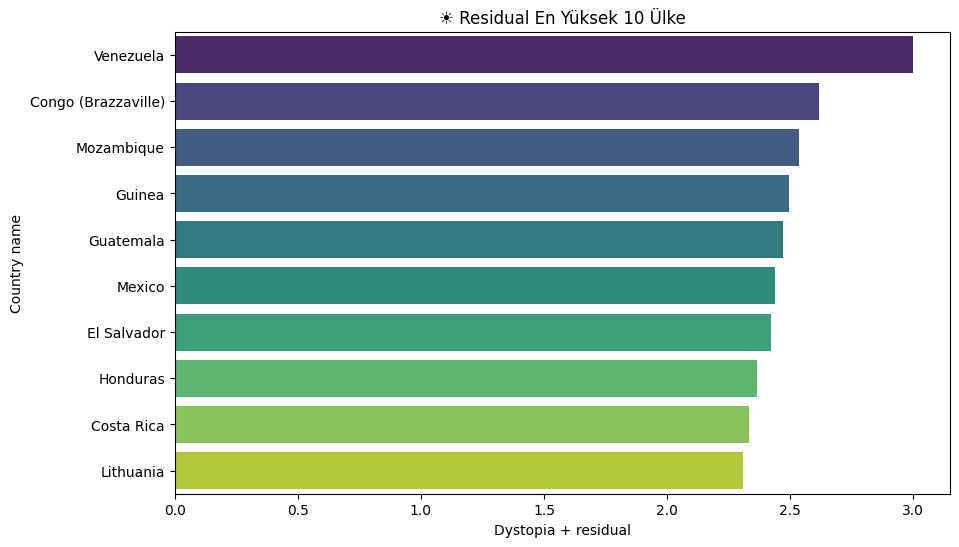

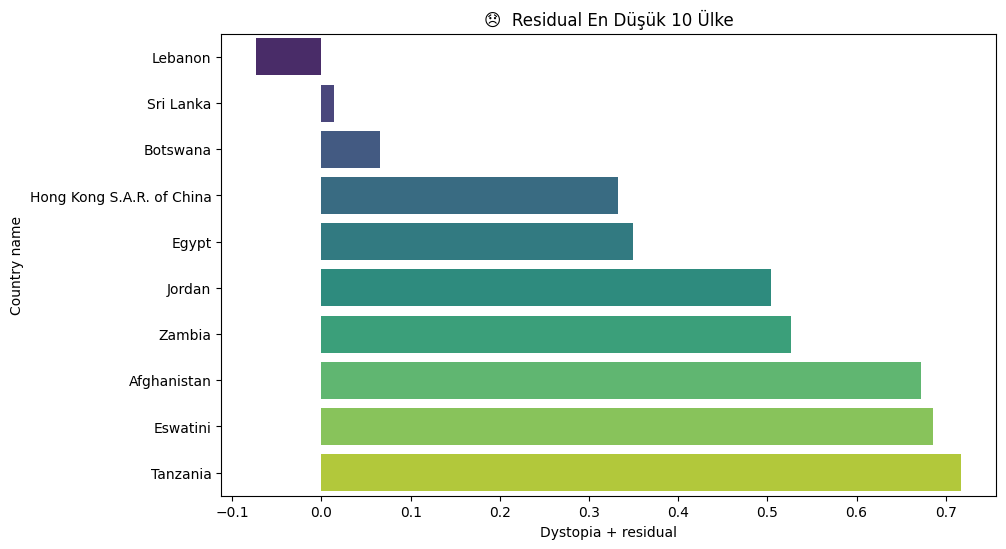

In [32]:
top_residuals = data_general.sort_values(by='Dystopia + residual', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_residuals, x='Dystopia + residual', y='Country name', palette='viridis')
plt.title('☀️ Residual En Yüksek 10 Ülke')
plt.show()

bad_residuals = data_general.sort_values(by='Dystopia + residual', ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=bad_residuals, x='Dystopia + residual', y='Country name', palette='viridis')
plt.title('😞  Residual En Düşük 10 Ülke')
plt.show()

Bölgelere göre ladder score dağılımına farklı bir grafikle baktım. Bu sayede bölgeler içindeki ülkelerin nasıl bir dağılım sergilediğine gözlemlenmiştir..

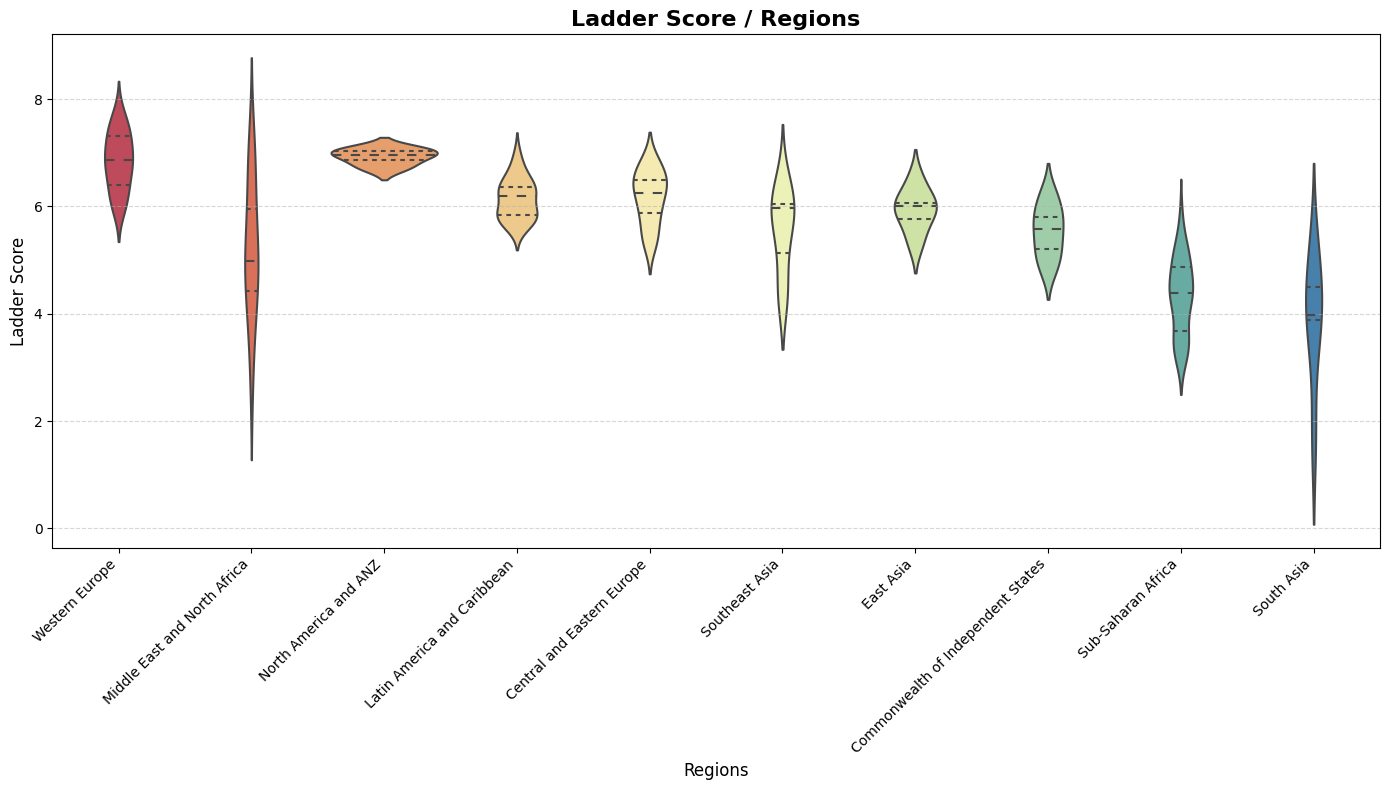

In [33]:
plt.figure(figsize=(14, 8))

sns.violinplot(data=data_general, x='Regional indicator', y='Ladder score', 
               palette='Spectral', inner='quartile')

plt.xticks(rotation=45, ha='right')
plt.title('Ladder Score / Regions', fontsize=16, fontweight='bold')
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Ladder Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<a id='7'></a>
 * [Yearly Analysis]

In [34]:
def pltscatter(var1,var2 = 'Life Ladder',df = data_yearly):
    df.plot(kind='scatter', x=var1, y=var2,alpha = 0.5,color = 'blueviolet')
    plt.xlabel(var1)             
    plt.ylabel(var2)


In [35]:
data_yearly.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

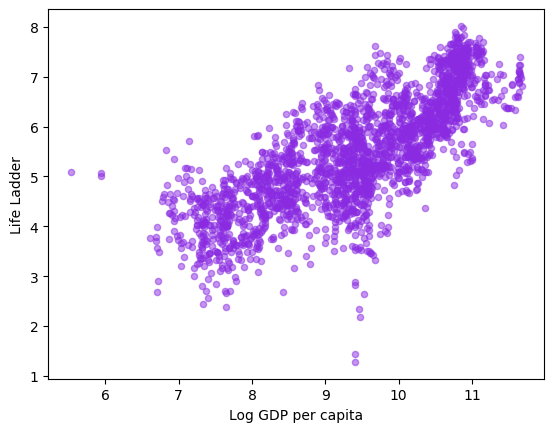

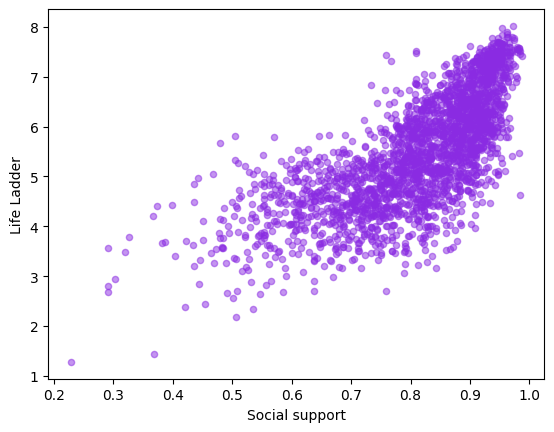

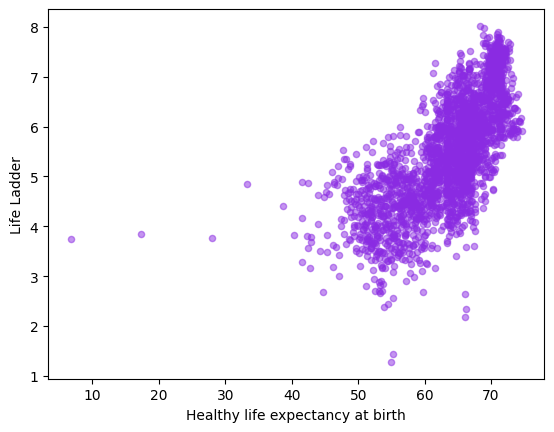

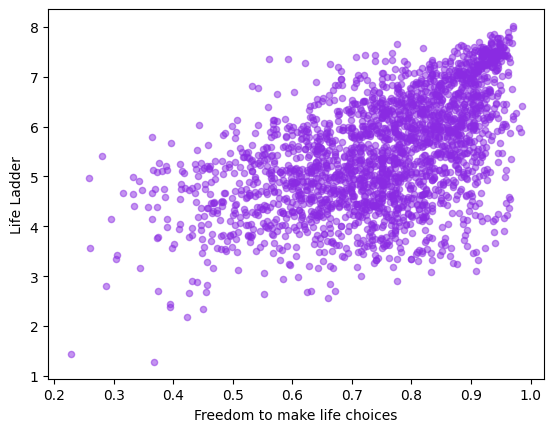

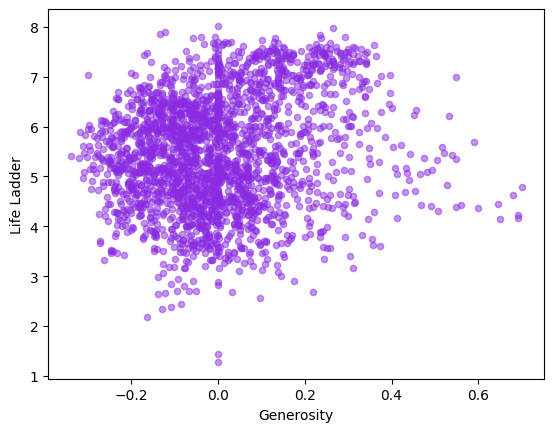

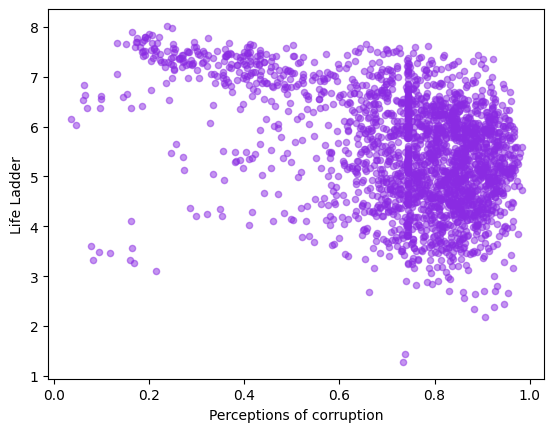

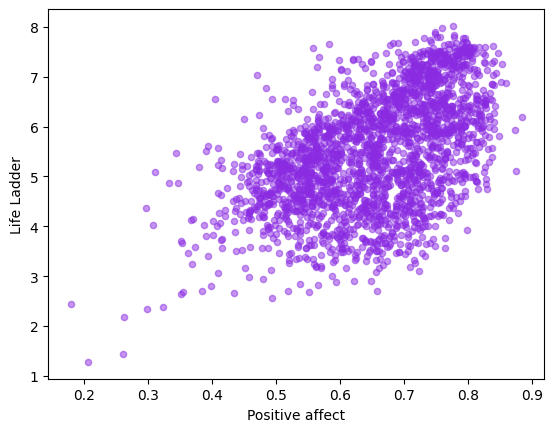

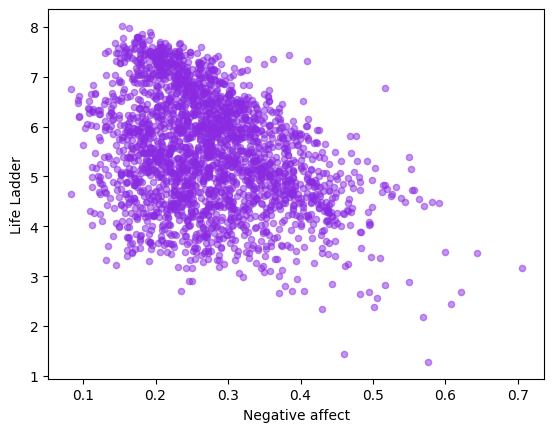

In [36]:
cat2=['Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']
for c in cat2:
    pltscatter(c)

Bu grafiklere göre en çok ilgimi çeken generosity grafiği oldu. Life ladder artıkça azalması oldukça ilginç. 

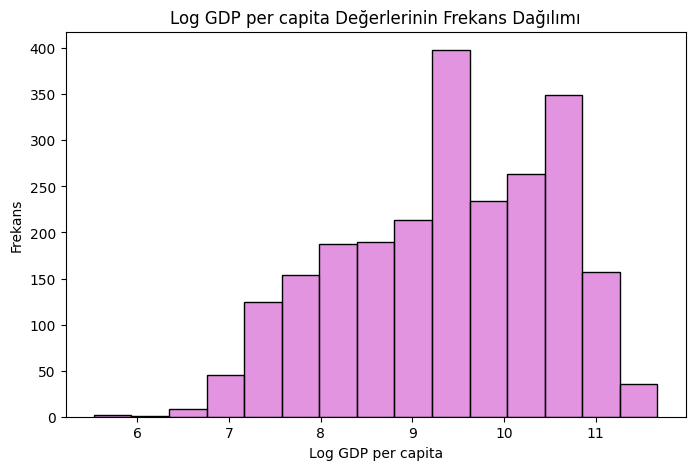

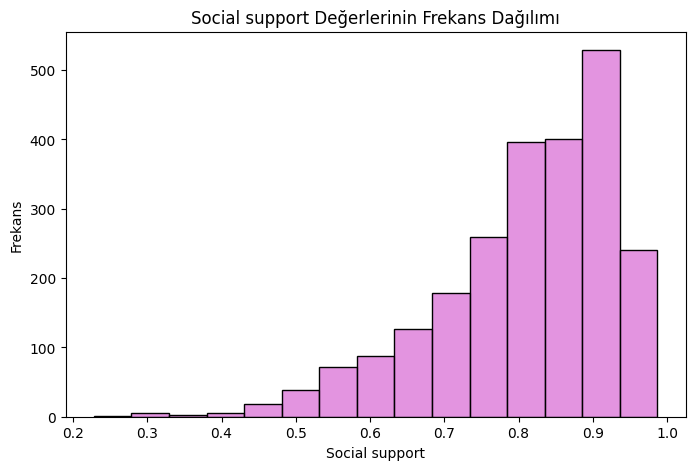

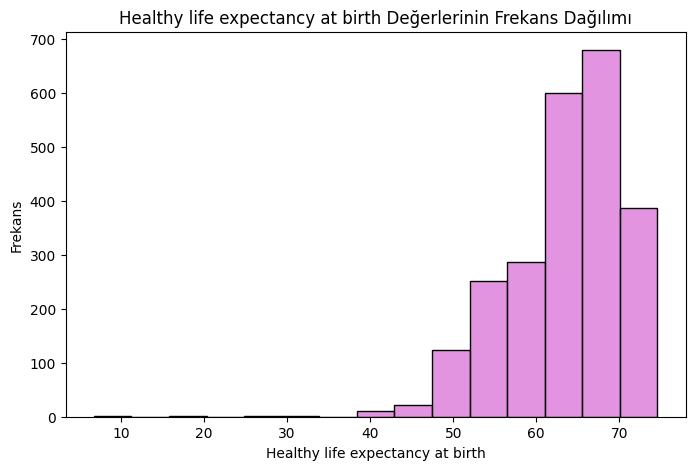

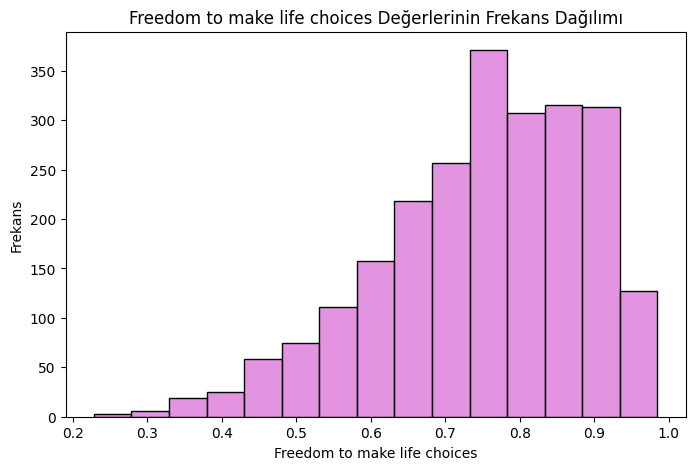

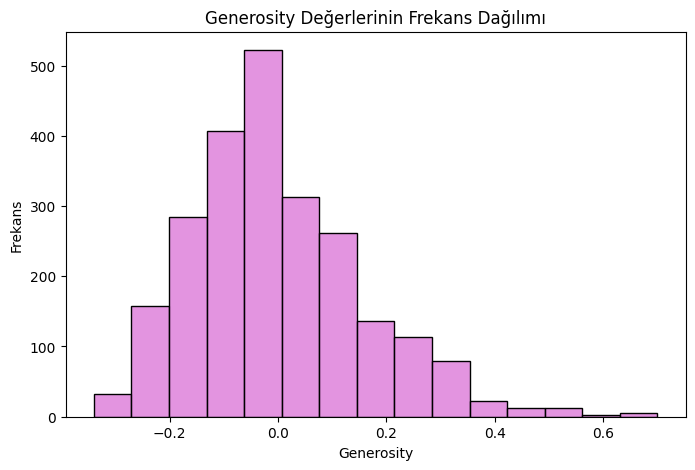

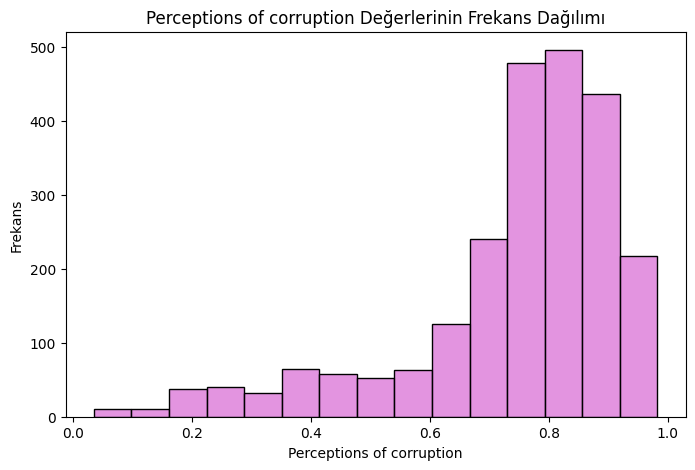

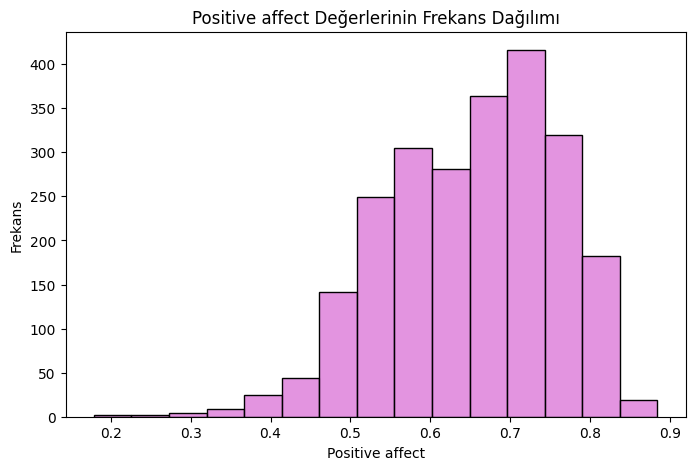

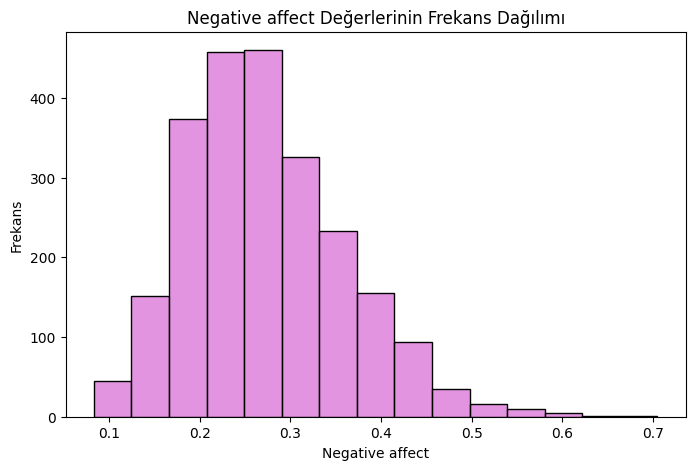

In [37]:
def plot_histogram(variable, df=data_yearly):

    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df,
        x=variable,
        bins=15,
        color='orchid'
    )
    plt.title(f'{variable} Değerlerinin Frekans Dağılımı')
    plt.xlabel(variable)
    plt.ylabel('Frekans')
    plt.show()
for c in cat2:
    plot_histogram(c)

Sadece refah faktörlerine değil, insanların günlük duygusal deneyimlerine odaklandığımızda, dünya genelinde değişim grafiği aşağıdaki şekildedir.

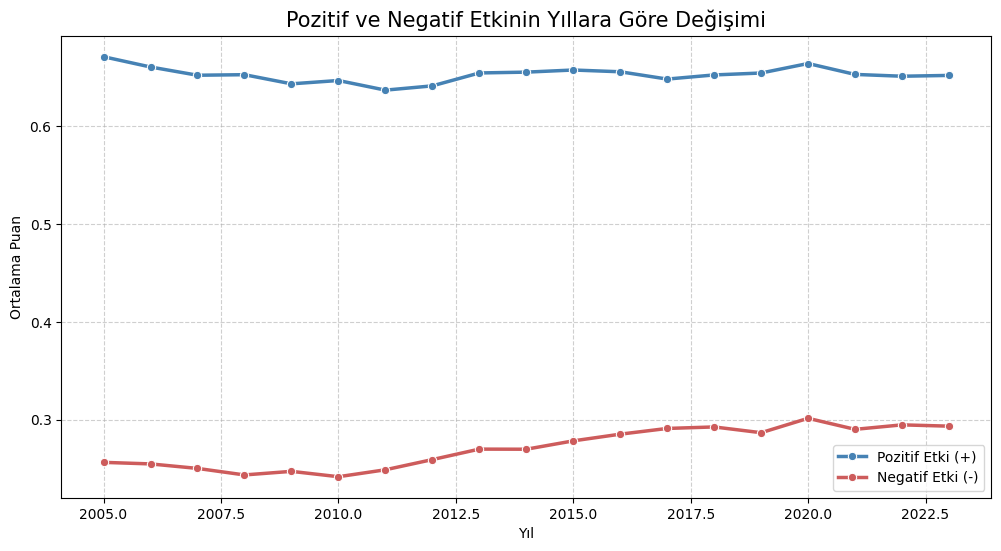

In [38]:
affect_trend = data_yearly.groupby('year')[['Positive affect', 'Negative affect']].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=affect_trend, x='year', y='Positive affect', label='Pozitif Etki (+)', 
             marker='o', color='steelblue', linewidth=2.5)

sns.lineplot(data=affect_trend, x='year', y='Negative affect', label='Negatif Etki (-)', 
             marker='o', color='indianred', linewidth=2.5)

plt.title('Pozitif ve Negatif Etkinin Yıllara Göre Değişimi', fontsize=15)
plt.xlabel('Yıl')
plt.ylabel('Ortalama Puan')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [39]:
data_general.columns

Index(['Country name', 'Regional indicator', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Dystopia + residual', 'Prosperity Index',
       'Happiness Level'],
      dtype='object')

In [40]:
data_yearly

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.051,0.831,0.658,0.235
2359,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.003,0.789,0.661,0.346
2360,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.079,0.757,0.610,0.242
2361,Zimbabwe,2022,3.296,7.670,0.666,54.525,0.652,-0.073,0.753,0.641,0.191


<a id='8'></a>
# Combined Datasets

İki verisetini birleştirmeye odaklandım.

Pozitif bir Happiness_Change değeri, ilgili ülkenin güncel mutluluk skorunun geçmiş yıllar ortalamasının üzerinde olduğunu; negatif değerler ise geçmiş ortalamanın altında kaldığını göstermektedir.


In [41]:
averages = data_yearly.groupby('Country name')[['Positive affect', 'Negative affect', 'Life Ladder']].mean().reset_index()
averages.columns = ['Country name', 'Positive averages', 'Negative averages', 'Life Ladder averages']

combined_data = pd.merge(data_general, averages, on='Country name')

combined_data['Happiness_Change'] = combined_data['Ladder score'] - combined_data['Life Ladder averages']
combined_data

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Prosperity Index,Happiness Level,Positive averages,Negative averages,Life Ladder averages,Happiness_Change
0,Finland,Western Europe,7.741,7.815,7.667,1.098248,1.317793,1.059525,0.859,0.142,0.546,2.082,3.475565,high,0.737563,0.185188,7.624062,0.116937
1,Denmark,Western Europe,7.583,7.665,7.500,1.249342,1.161225,1.083865,0.823,0.204,0.548,1.881,3.494432,high,0.782444,0.199889,7.664111,-0.081111
2,Iceland,Western Europe,7.525,7.618,7.433,1.185599,1.453284,1.199485,0.819,0.258,0.182,2.050,3.838368,high,0.805182,0.165818,7.468000,0.057000
3,Sweden,Western Europe,7.344,7.422,7.267,1.178516,1.104018,1.235996,0.838,0.221,0.524,1.658,3.518530,high,0.760389,0.180722,7.365167,-0.021167
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.001453,1.140149,1.333360,0.641,0.153,0.193,2.298,3.474961,high,0.606611,0.308389,7.238833,0.102167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Congo (Kinshasa),Sub-Saharan Africa,3.295,3.462,3.128,-1.994458,-1.413110,-1.575378,0.473,0.189,0.072,1.102,-4.982945,low,0.555100,0.309800,4.137700,-0.842700
138,Sierra Leone,Sub-Saharan Africa,3.245,3.366,3.124,-1.711156,-1.711191,-1.630145,0.469,0.181,0.053,1.068,-5.052492,low,0.556733,0.402667,3.939067,-0.694067
139,Lesotho,Sub-Saharan Africa,3.186,3.469,2.904,-1.434938,-0.853079,-3.169707,0.523,0.082,0.085,0.875,-5.457724,low,0.712200,0.251200,3.839800,-0.653800
140,Lebanon,Middle East and North Africa,2.707,2.797,2.616,-0.004266,-1.678071,0.213678,0.173,0.068,0.029,-0.073,-1.468659,low,0.438722,0.357500,4.471944,-1.764944


Bu analizde, ülkelerin mevcut Ladder score ile son 10 yıldaki mutluluk değişimleri gözlemledim.

* Sol üst bölgedeki ülkeler, düşük Ladder score'a rağmen mutluluğunu en çok artıran ülkeler

* Sağ alt bölge, yüksek Ladder score'a sahip olmasına rağmen mutluluk oranı azalan ülkeler

In [42]:
h_2014 = data_yearly[data_yearly['year'] == 2014][['Country name', 'Life Ladder']]
h_2023 = data_yearly[data_yearly['year'] == 2023][['Country name', 'Life Ladder']]
delta_data = pd.merge(h_2014, h_2023, on='Country name', suffixes=('_2014', '_2023'))
delta_data['10y_Progress'] = delta_data['Life Ladder_2023'] - delta_data['Life Ladder_2014']

comb_1 = pd.merge(data_general[['Country name', 'Ladder score', 'Regional indicator']], 
                  delta_data[['Country name', '10y_Progress']], on='Country name')
comb_1

,Country name,Ladder score,Regional indicator,10y_Progress
0,Finland,7.741,Western Europe,0.314
1,Denmark,7.583,Western Europe,-0.004
2,Sweden,7.344,Western Europe,-0.078
3,Israel,7.341,Middle East and North Africa,-0.618
4,Netherlands,7.319,Western Europe,-0.066
...,...,...,...,...
124,Zimbabwe,3.341,Sub-Saharan Africa,-0.612
125,Congo (Kinshasa),3.295,Sub-Saharan Africa,-1.031
126,Sierra Leone,3.245,Sub-Saharan Africa,-1.033
127,Lebanon,2.707,Middle East and North Africa,-1.645


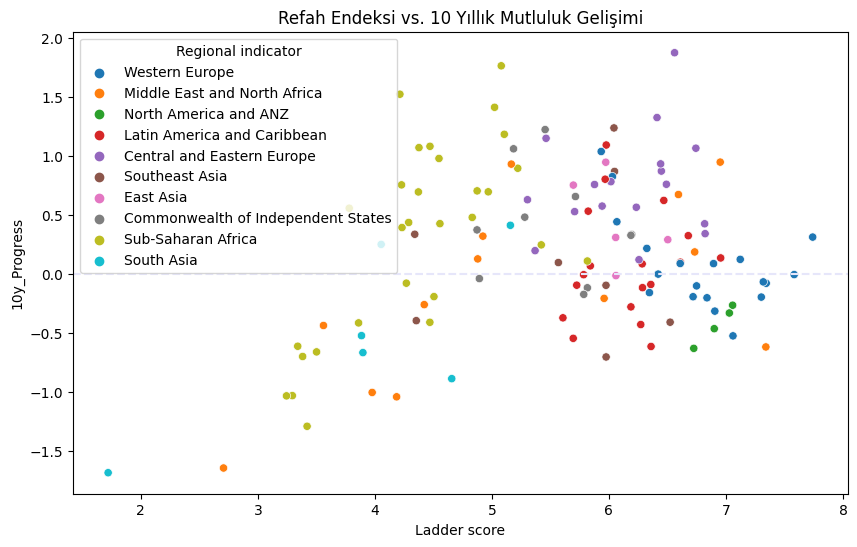

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comb_1, x='Ladder score', y='10y_Progress', hue='Regional indicator')
plt.axhline(0, color='lavender', linestyle='--') 
plt.title('Refah Endeksi vs. 10 Yıllık Mutluluk Gelişimi')
plt.show()

Bu kombinasyon, mutluluğun ne kadar değiştiğini kanıtlar.

Happiness volatility yüksek ülkelerin mutluluk oranları yıllar içerisinde değişmiştir;düşük ülkeleri ise stabil oranlara sahiptir.

In [44]:
stability = data_yearly.groupby('Country name')['Life Ladder'].std().reset_index()
stability.columns = ['Country name', 'Happiness_Volatility']

comb_2 = pd.merge(data_general[['Country name', 'Ladder score', 'Regional indicator']], stability, on='Country name')
comb_2

,Country name,Ladder score,Regional indicator,Happiness_Volatility
0,Finland,7.741,Western Europe,0.185398
1,Denmark,7.583,Western Europe,0.159031
2,Iceland,7.525,Western Europe,0.197389
3,Sweden,7.344,Western Europe,0.106087
4,Israel,7.341,Middle East and North Africa,0.233617
...,...,...,...,...
137,Congo (Kinshasa),3.295,Sub-Saharan Africa,0.504734
138,Sierra Leone,3.245,Sub-Saharan Africa,0.668457
139,Lesotho,3.186,Sub-Saharan Africa,0.643761
140,Lebanon,2.707,Middle East and North Africa,1.070759


Sağ alt köşe mutlu ve stabil ülkeler;sağ üst köşe, mutlu olan ama geçmişte stabil olmayan ülkelerdir.

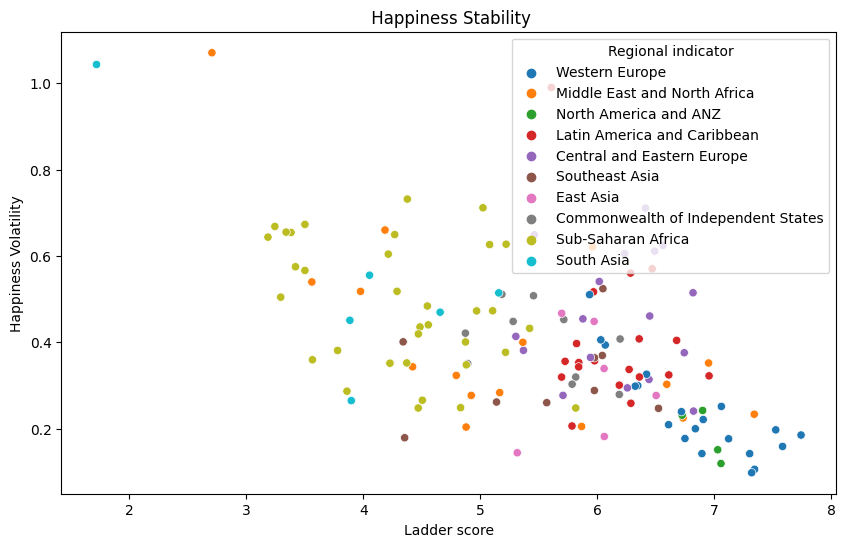

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=comb_2, x='Ladder score', y='Happiness_Volatility', hue='Regional indicator')
plt.title(' Happiness Stability')
plt.ylabel('Happiness Volatility')
plt.show()